In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
pwd = os.getcwd()
team_stats = pd.read_csv(pwd + "/../datasets/team_year_stats.csv")
team_stats

Team    FG   FGA    FG%    3P   3PA    3P%    2P   2PA  \
0            Brooklyn Nets  43.2  87.7  0.493  14.1  36.3  0.388  29.1  51.4   
1          Milwaukee Bucks  44.5  91.5  0.486  14.5  37.1  0.392  30.0  54.4   
2                Utah Jazz  41.1  88.1  0.467  16.9  43.4  0.391  24.2  44.8   
3     Los Angeles Clippers  41.9  87.0  0.482  14.4  34.5  0.416  27.5  52.4   
4           Denver Nuggets  43.5  89.1  0.488  13.0  34.1  0.380  30.5  55.0   
5     New Orleans Pelicans  42.7  88.5  0.482  10.7  30.6  0.351  32.0  57.9   
6       Washington Wizards  42.6  90.0  0.473  10.2  29.2  0.350  32.4  60.8   
7            Atlanta Hawks  40.2  87.0  0.462  12.4  33.5  0.370  27.8  53.5   
8   Portland Trail Blazers  40.9  91.3  0.448  15.7  41.4  0.380  25.1  49.9   
9   Minnesota Timberwolves  40.4  90.9  0.445  13.0  37.2  0.350  27.4  53.7   
10   Golden State Warriors  41.0  88.2  0.465  14.2  38.0  0.374  26.9  50.2   
11          Indiana Pacers  42.8  90.8  0.471  12.4  34.3  0.361  30.4  56.5   
12            Phoenix Suns  43.1  88.2  0.489  13.0  34.8  0.373  30.1  53.4   
13          Boston Celtics  41.4  88.7  0.466  13.3  35.9  0.372  28.0  52.8   
14        Sacramento Kings  42.7  88.5  0.482  12.0  33.0  0.365  30.6  55.5   
15      Philadelphia 76ers  41.4  86.9  0.476  11.1  29.9  0.371  30.3  56.9   
16         Toronto Raptors  39.7  88.2  0.450  14.7  39.7  0.371  24.9  48.5   
17       Memphis Grizzlies  42.9  92.1  0.466  11.0  31.0  0.356  31.9  61.1   
18           Chicago Bulls  42.3  88.4  0.478  12.3  33.6  0.365  30.0  54.8   
19        Dallas Mavericks  41.0  87.1  0.470  13.7  38.0  0.362  27.2  49.1   
20       Charlotte Hornets  40.0  87.4  0.458  13.9  37.0  0.377  26.1  50.4   
21      Los Angeles Lakers  40.8  86.0  0.474  11.1  31.4  0.352  29.7  54.6   
22         Houston Rockets  39.0  88.4  0.441  13.4  40.0  0.335  25.6  48.4   
23       San Antonio Spurs  41.7  90.1  0.462  10.3  28.9  0.356  31.4  61.2   
24         Detroit Pistons  38.6  85.8  0.450  11.8  33.1  0.355  26.8  52.7   
25              Miami Heat  38.6  83.5  0.463  12.7  36.1  0.350  26.0  47.4   
26         New York Knicks  39.5  86.5  0.457  11.5  29.7  0.387  28.0  56.8   
27   Oklahoma City Thunder  38.8  87.8  0.442  12.2  35.7  0.342  26.6  52.1   
28           Orlando Magic  38.4  89.3  0.430  11.1  32.0  0.346  27.3  57.3   
29     Cleveland Cavaliers  38.9  85.7  0.454   9.9  29.3  0.338  29.0  56.3   

      2P%  ...   3PAr    TS%   eFG%  TOV%  ORB%  FT/FGA  opponent_eFG%  \
0   0.567  ...  0.414  0.608  0.573  12.3  21.8   0.209          0.535   
1   0.550  ...  0.405  0.593  0.565  12.2  23.3   0.173          0.532   
2   0.541  ...  0.492  0.596  0.563  12.7  24.2   0.195          0.506   
3   0.525  ...  0.397  0.599  0.564  12.0  22.9   0.186          0.532   
4   0.554  ...  0.382  0.591  0.561  12.2  24.8   0.175          0.544   
5   0.552  ...  0.346  0.576  0.543  12.8  26.4   0.216          0.550   
6   0.533  ...  0.325  0.568  0.530  12.6  21.1   0.219          0.538   
7   0.520  ...  0.385  0.576  0.533  12.1  24.5   0.228          0.531   
8   0.504  ...  0.454  0.572  0.534  10.1  23.4   0.193          0.549   
9   0.511  ...  0.410  0.552  0.517  12.5  22.3   0.191          0.556   
10  0.535  ...  0.431  0.578  0.546  13.3  17.8   0.189          0.525   
11  0.539  ...  0.378  0.573  0.540  11.9  20.1   0.182          0.531   
12  0.564  ...  0.394  0.594  0.562  11.8  20.9   0.172          0.529   
13  0.531  ...  0.404  0.574  0.542  12.7  24.9   0.186          0.538   
14  0.552  ...  0.373  0.581  0.551  11.9  21.5   0.191          0.565   
15  0.531  ...  0.345  0.578  0.540  13.0  23.5   0.229          0.522   
16  0.514  ...  0.450  0.572  0.533  12.0  20.7   0.199          0.540   
17  0.522  ...  0.337  0.559  0.526  11.5  23.9   0.177          0.536   
18  0.548  ...  0.380  0.576  0.548  13.8  22.0   0.160          0.540   
19  0.554  ...  0.436  0.581  0.549  11.1  20.5   0.188      

In [29]:
team_stats.describe()

FG       FGA        FG%         3P        3PA        3P%  \
count  30.000000  30.00000  30.000000  30.000000  30.000000  30.000000   
mean   41.120000  88.29000   0.465667  12.683333  34.623333   0.365867   
std     1.695308   1.92593   0.015986   1.684428   3.796431   0.018315   
min    38.400000  83.50000   0.430000   9.900000  28.900000   0.335000   
25%    39.775000  87.02500   0.454750  11.200000  31.550000   0.351250   
50%    41.050000  88.20000   0.466000  12.550000  34.400000   0.365000   
75%    42.675000  89.25000   0.477500  13.850000  37.075000   0.376250   
max    44.500000  92.10000   0.493000  16.900000  43.400000   0.416000   

              2P        2PA        2P%         FT  ...       3PAr        TS%  \
count  30.000000  30.000000  30.000000  30.000000  ...  30.000000  30.000000   
mean   28.426667  53.660000   0.530100  16.966667  ...   0.392267   0.571500   
std     2.277769   4.060372   0.021429   1.380987  ...   0.042572   0.018171   
min    24.200000  44.800000   0.477000  14.100000  ...   0.321000   0.528000   
25%    26.825000  50.650000   0.514000  16.200000  ...   0.360500   0.558250   
50%    28.000000  53.600000   0.531000  16.600000  ...   0.390000   0.573500   
75%    30.250000  56.450000   0.548000  17.575000  ...   0.420750   0.580250   
max    32.400000  61.200000   0.567000  19.900000  ...   0.492000   0.608000   

            eFG%       TOV%       ORB%     FT/FGA  opponent_eFG%  \
count  30.000000  30.000000  30.000000  30.000000      30.000000   
mean    0.537567  12.463333  22.213333   0.192267       0.537533   
std     0.019013   1.019291   1.927967   0.016488       0.012456   
min     0.492000  10.100000  17.800000   0.160000       0.506000   
25%     0.523750  11.925000  20.825000   0.181250       0.531250   
50%     0.538000  12.400000  22.300000   0.190000       0.537500   
75%     0.548750  13.175000  23.475000   0.198750       0.546250   
max     0.573000  14.500000  26.400000   0.229000       0.565000   

       opponent_TOV%       DRB%  opponent_FT/FGA  
count      30.000000  30.000000        30.000000  
mean       12.463333  77.773333         0.192367  
std         1.024016   1.412001         0.018474  
min        10.300000  74.800000         0.157000  
25%        11.650000  76.850000         0.182750  
50%        12.500000  77.750000         0.194500  
75%        13.275000  78.875000         0.200750  
max        14.500000  80.400000         0.235000  

[8 rows x 64 columns]

In [30]:
team_stats.columns

Index(['Team', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'FG_opponent', 'FGA_opponent', 'FG%_opponent',
       '3P_opponent', '3PA_opponent', '3P%_opponent', '2P_opponent',
       '2PA_opponent', '2P%_opponent', 'FT_opponent', 'FTA_opponent',
       'FT%_opponent', 'ORB_opponent', 'DRB_opponent', 'TRB_opponent',
       'AST_opponent', 'STL_opponent', 'BLK_opponent', 'TOV_opponent',
       'PF_opponent', 'PTS_opponent', 'W', 'L', 'PW', 'PL', 'MOV', 'SOS',
       'SRS', 'ORtg', 'DRtg', 'NRtg', 'Pace', 'FTr', '3PAr', 'TS%', 'eFG%',
       'TOV%', 'ORB%', 'FT/FGA', 'opponent_eFG%', 'opponent_TOV%', 'DRB%',
       'opponent_FT/FGA'],
      dtype='object')

In [31]:
preprocessing_data = team_stats.drop(columns="Team")
preprocessing_data

FG   FGA    FG%    3P   3PA    3P%    2P   2PA    2P%    FT  ...   3PAr  \
0   43.2  87.7  0.493  14.1  36.3  0.388  29.1  51.4  0.567  18.3  ...  0.414   
1   44.5  91.5  0.486  14.5  37.1  0.392  30.0  54.4  0.550  15.8  ...  0.405   
2   41.1  88.1  0.467  16.9  43.4  0.391  24.2  44.8  0.541  17.2  ...  0.492   
3   41.9  87.0  0.482  14.4  34.5  0.416  27.5  52.4  0.525  16.2  ...  0.397   
4   43.5  89.1  0.488  13.0  34.1  0.380  30.5  55.0  0.554  15.6  ...  0.382   
5   42.7  88.5  0.482  10.7  30.6  0.351  32.0  57.9  0.552  19.1  ...  0.346   
6   42.6  90.0  0.473  10.2  29.2  0.350  32.4  60.8  0.533  19.7  ...  0.325   
7   40.2  87.0  0.462  12.4  33.5  0.370  27.8  53.5  0.520  19.8  ...  0.385   
8   40.9  91.3  0.448  15.7  41.4  0.380  25.1  49.9  0.504  17.7  ...  0.454   
9   40.4  90.9  0.445  13.0  37.2  0.350  27.4  53.7  0.511  17.4  ...  0.410   
10  41.0  88.2  0.465  14.2  38.0  0.374  26.9  50.2  0.535  16.7  ...  0.431   
11  42.8  90.8  0.471  12.4  34.3  0.361  30.4  56.5  0.539  16.5  ...  0.378   
12  43.1  88.2  0.489  13.0  34.8  0.373  30.1  53.4  0.564  15.2  ...  0.394   
13  41.4  88.7  0.466  13.3  35.9  0.372  28.0  52.8  0.531  16.5  ...  0.404   
14  42.7  88.5  0.482  12.0  33.0  0.365  30.6  55.5  0.552  16.9  ...  0.373   
15  41.4  86.9  0.476  11.1  29.9  0.371  30.3  56.9  0.531  19.9  ...  0.345   
16  39.7  88.2  0.450  14.7  39.7  0.371  24.9  48.5  0.514  17.5  ...  0.450   
17  42.9  92.1  0.466  11.0  31.0  0.356  31.9  61.1  0.522  16.3  ...  0.337   
18  42.3  88.4  0.478  12.3  33.6  0.365  30.0  54.8  0.548  14.1  ...  0.380   
19  41.0  87.1  0.470  13.7  38.0  0.362  27.2  49.1  0.554  16.4  ...  0.436   
20  40.0  87.4  0.458  13.9  37.0  0.377  26.1  50.4  0.518  15.8  ...  0.423   
21  40.8  86.0  0.474  11.1  31.4  0.352  29.7  54.6  0.544  17.0  ...  0.365   
22  39.0  88.4  0.441  13.4  40.0  0.335  25.6  48.4  0.530  16.5  ...  0.452   
23  41.7  90.1  0.462  10.3  28.9  0.356  31.4  61.2  0.513  17.6  ...  0.321   
24  38.6  85.8  0.450  11.8  33.1  0.355  26.8  52.7  0.509  18.2  ...  0.386   
25  38.6  83.5  0.463  12.7  36.1  0.350  26.0  47.4  0.548  16.8  ...  0.432   
26  39.5  86.5  0.457  11.5  29.7  0.387  28.0  56.8  0.493  16.5  ...  0.344   
27  38.8  87.8  0.442  12.2  35.7  0.342  26.6  52.1  0.510  15.4  ...  0.406   
28  38.4  89.3  0.430  11.1  32.0  0.346  27.3  57.3  0.477  16.2  ...  0.359   
29  38.9  85.7  0.454   9.9  29.3  0.338  29.0  56.3  0.514  16.2  ...  0.342   

      TS%   eFG%  TOV%  ORB%  FT/FGA  opponent_eFG%  opponent_TOV%  DRB%  \
0   0.608  0.573  12.3  21.8   0.209          0.535           11.3  77.6   
1   0.593  0.565  12.2  23.3   0.173          0.532           11.6  79.7   
2   0.596  0.563  12.7  24.2   0.195          0.506           10.3  79.0   
3   0.599  0.564  12.0  22.9   0.186          0.532           11.9  79.1   
4   0.591  0.561  12.2  24.8   0.175          0.544           12.8  78.9   
5   0.576  0.543  12.8  26.4   0.216          0.550           11.9  79.8   
6   0.568  0.530  12.6  21.1   0.219          0.538           12.5  77.7   
7   0.576  0.533  12.1  24.5   0.228          0.531           11.2  77.5   
8   0.572  0.534  10.1  23.4   0.193          0.549           11.3  77.2   
9   0.552  0.517  12.5  22.3   0.191          0.556           13.2  76.8   
10  0.578  0.546  13.3  17.8   0.189          0.525           13.3  76.6   
11  0.573  0.540  11.9  20.1   0.182          0.531           13.0  74.8   
12  0.594  0.562  11.8  20.9   0.172          0.529           12.5  78.7   
13  0.574  0.542  12.7  24.9   0.186          0.538           12.9  77.9   
14  0.581  0.551  11.9  21.5   0.191          0.565           11.9  74.8   
15  0.578  0.540  13.0  23.5   0.229          0.522           13.9  78.7   
16  0.572  0.533  12.0  20.7   0.199          0.540           14.5  76.1   
17  0.559  0.526  11.5  23.9   0.177          0.536           13.4  78.8   
18  0.576  0.548  13.8  22.0   0.160          0.54

In [32]:
preprocessing_data.drop(columns=["L", "PW", "PL", "SOS"], inplace=True)
X = preprocessing_data.drop(columns="W")
y = preprocessing_data["W"]

In [33]:
model = ExtraTreesClassifier()
model.fit(X,y)
model.feature_importances_

array([0.01465679, 0.01551818, 0.02715801, 0.01688052, 0.01235774,
       0.0253249 , 0.01540406, 0.01230566, 0.01879363, 0.01583414,
       0.01586245, 0.0220008 , 0.01267923, 0.01739515, 0.01909752,
       0.0149116 , 0.01750666, 0.01254905, 0.01623645, 0.01888678,
       0.02417045, 0.01632809, 0.02369667, 0.01117655, 0.01186916,
       0.00862206, 0.01305454, 0.01349123, 0.0081559 , 0.01857093,
       0.01016933, 0.01216337, 0.0317442 , 0.01182183, 0.01350131,
       0.01906942, 0.01231704, 0.01656346, 0.01084287, 0.01583217,
       0.01925525, 0.01261879, 0.0335737 , 0.02985689, 0.02500455,
       0.01860693, 0.03685287, 0.01627162, 0.01720658, 0.00838167,
       0.02165062, 0.02488419, 0.01935191, 0.01506295, 0.01497334,
       0.01163164, 0.00700533, 0.01081163, 0.01247965])

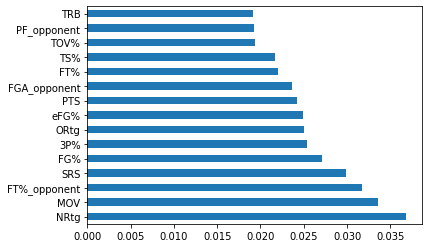

In [34]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind="barh")
plt.show()

In [36]:
revised_X = X
revised_X[revised_X < 0] = 0
revised_X

FG   FGA    FG%    3P   3PA    3P%    2P   2PA    2P%    FT  ...   3PAr  \
0   43.2  87.7  0.493  14.1  36.3  0.388  29.1  51.4  0.567  18.3  ...  0.414   
1   44.5  91.5  0.486  14.5  37.1  0.392  30.0  54.4  0.550  15.8  ...  0.405   
2   41.1  88.1  0.467  16.9  43.4  0.391  24.2  44.8  0.541  17.2  ...  0.492   
3   41.9  87.0  0.482  14.4  34.5  0.416  27.5  52.4  0.525  16.2  ...  0.397   
4   43.5  89.1  0.488  13.0  34.1  0.380  30.5  55.0  0.554  15.6  ...  0.382   
5   42.7  88.5  0.482  10.7  30.6  0.351  32.0  57.9  0.552  19.1  ...  0.346   
6   42.6  90.0  0.473  10.2  29.2  0.350  32.4  60.8  0.533  19.7  ...  0.325   
7   40.2  87.0  0.462  12.4  33.5  0.370  27.8  53.5  0.520  19.8  ...  0.385   
8   40.9  91.3  0.448  15.7  41.4  0.380  25.1  49.9  0.504  17.7  ...  0.454   
9   40.4  90.9  0.445  13.0  37.2  0.350  27.4  53.7  0.511  17.4  ...  0.410   
10  41.0  88.2  0.465  14.2  38.0  0.374  26.9  50.2  0.535  16.7  ...  0.431   
11  42.8  90.8  0.471  12.4  34.3  0.361  30.4  56.5  0.539  16.5  ...  0.378   
12  43.1  88.2  0.489  13.0  34.8  0.373  30.1  53.4  0.564  15.2  ...  0.394   
13  41.4  88.7  0.466  13.3  35.9  0.372  28.0  52.8  0.531  16.5  ...  0.404   
14  42.7  88.5  0.482  12.0  33.0  0.365  30.6  55.5  0.552  16.9  ...  0.373   
15  41.4  86.9  0.476  11.1  29.9  0.371  30.3  56.9  0.531  19.9  ...  0.345   
16  39.7  88.2  0.450  14.7  39.7  0.371  24.9  48.5  0.514  17.5  ...  0.450   
17  42.9  92.1  0.466  11.0  31.0  0.356  31.9  61.1  0.522  16.3  ...  0.337   
18  42.3  88.4  0.478  12.3  33.6  0.365  30.0  54.8  0.548  14.1  ...  0.380   
19  41.0  87.1  0.470  13.7  38.0  0.362  27.2  49.1  0.554  16.4  ...  0.436   
20  40.0  87.4  0.458  13.9  37.0  0.377  26.1  50.4  0.518  15.8  ...  0.423   
21  40.8  86.0  0.474  11.1  31.4  0.352  29.7  54.6  0.544  17.0  ...  0.365   
22  39.0  88.4  0.441  13.4  40.0  0.335  25.6  48.4  0.530  16.5  ...  0.452   
23  41.7  90.1  0.462  10.3  28.9  0.356  31.4  61.2  0.513  17.6  ...  0.321   
24  38.6  85.8  0.450  11.8  33.1  0.355  26.8  52.7  0.509  18.2  ...  0.386   
25  38.6  83.5  0.463  12.7  36.1  0.350  26.0  47.4  0.548  16.8  ...  0.432   
26  39.5  86.5  0.457  11.5  29.7  0.387  28.0  56.8  0.493  16.5  ...  0.344   
27  38.8  87.8  0.442  12.2  35.7  0.342  26.6  52.1  0.510  15.4  ...  0.406   
28  38.4  89.3  0.430  11.1  32.0  0.346  27.3  57.3  0.477  16.2  ...  0.359   
29  38.9  85.7  0.454   9.9  29.3  0.338  29.0  56.3  0.514  16.2  ...  0.342   

      TS%   eFG%  TOV%  ORB%  FT/FGA  opponent_eFG%  opponent_TOV%  DRB%  \
0   0.608  0.573  12.3  21.8   0.209          0.535           11.3  77.6   
1   0.593  0.565  12.2  23.3   0.173          0.532           11.6  79.7   
2   0.596  0.563  12.7  24.2   0.195          0.506           10.3  79.0   
3   0.599  0.564  12.0  22.9   0.186          0.532           11.9  79.1   
4   0.591  0.561  12.2  24.8   0.175          0.544           12.8  78.9   
5   0.576  0.543  12.8  26.4   0.216          0.550           11.9  79.8   
6   0.568  0.530  12.6  21.1   0.219          0.538           12.5  77.7   
7   0.576  0.533  12.1  24.5   0.228          0.531           11.2  77.5   
8   0.572  0.534  10.1  23.4   0.193          0.549           11.3  77.2   
9   0.552  0.517  12.5  22.3   0.191          0.556           13.2  76.8   
10  0.578  0.546  13.3  17.8   0.189          0.525           13.3  76.6   
11  0.573  0.540  11.9  20.1   0.182          0.531           13.0  74.8   
12  0.594  0.562  11.8  20.9   0.172          0.529           12.5  78.7   
13  0.574  0.542  12.7  24.9   0.186          0.538           12.9  77.9   
14  0.581  0.551  11.9  21.5   0.191          0.565           11.9  74.8   
15  0.578  0.540  13.0  23.5   0.229          0.522           13.9  78.7   
16  0.572  0.533  12.0  20.7   0.199          0.540           14.5  76.1   
17  0.559  0.526  11.5  23.9   0.177          0.536           13.4  78.8   
18  0.576  0.548  13.8  22.0   0.160          0.54

In [37]:
bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(revised_X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(revised_X.columns)
feature_scores = pd.concat([dfcolumns, dfscores], axis=1)
feature_scores.columns = ["Specs", "Score"]
feature_scores.nlargest(15, "Score")

Specs       Score
46          NRtg  103.659677
42           MOV  103.308750
43           SRS  102.827528
4            3PA    5.846019
7            2PA    4.672450
10           FTA    3.842207
3             3P    3.729304
44          ORtg    3.520001
20           PTS    3.325011
6             2P    3.041170
15           AST    2.846639
31  FTA_opponent    2.667492
30   FT_opponent    2.517217
28  2PA_opponent    2.451304
25  3PA_opponent    2.170880

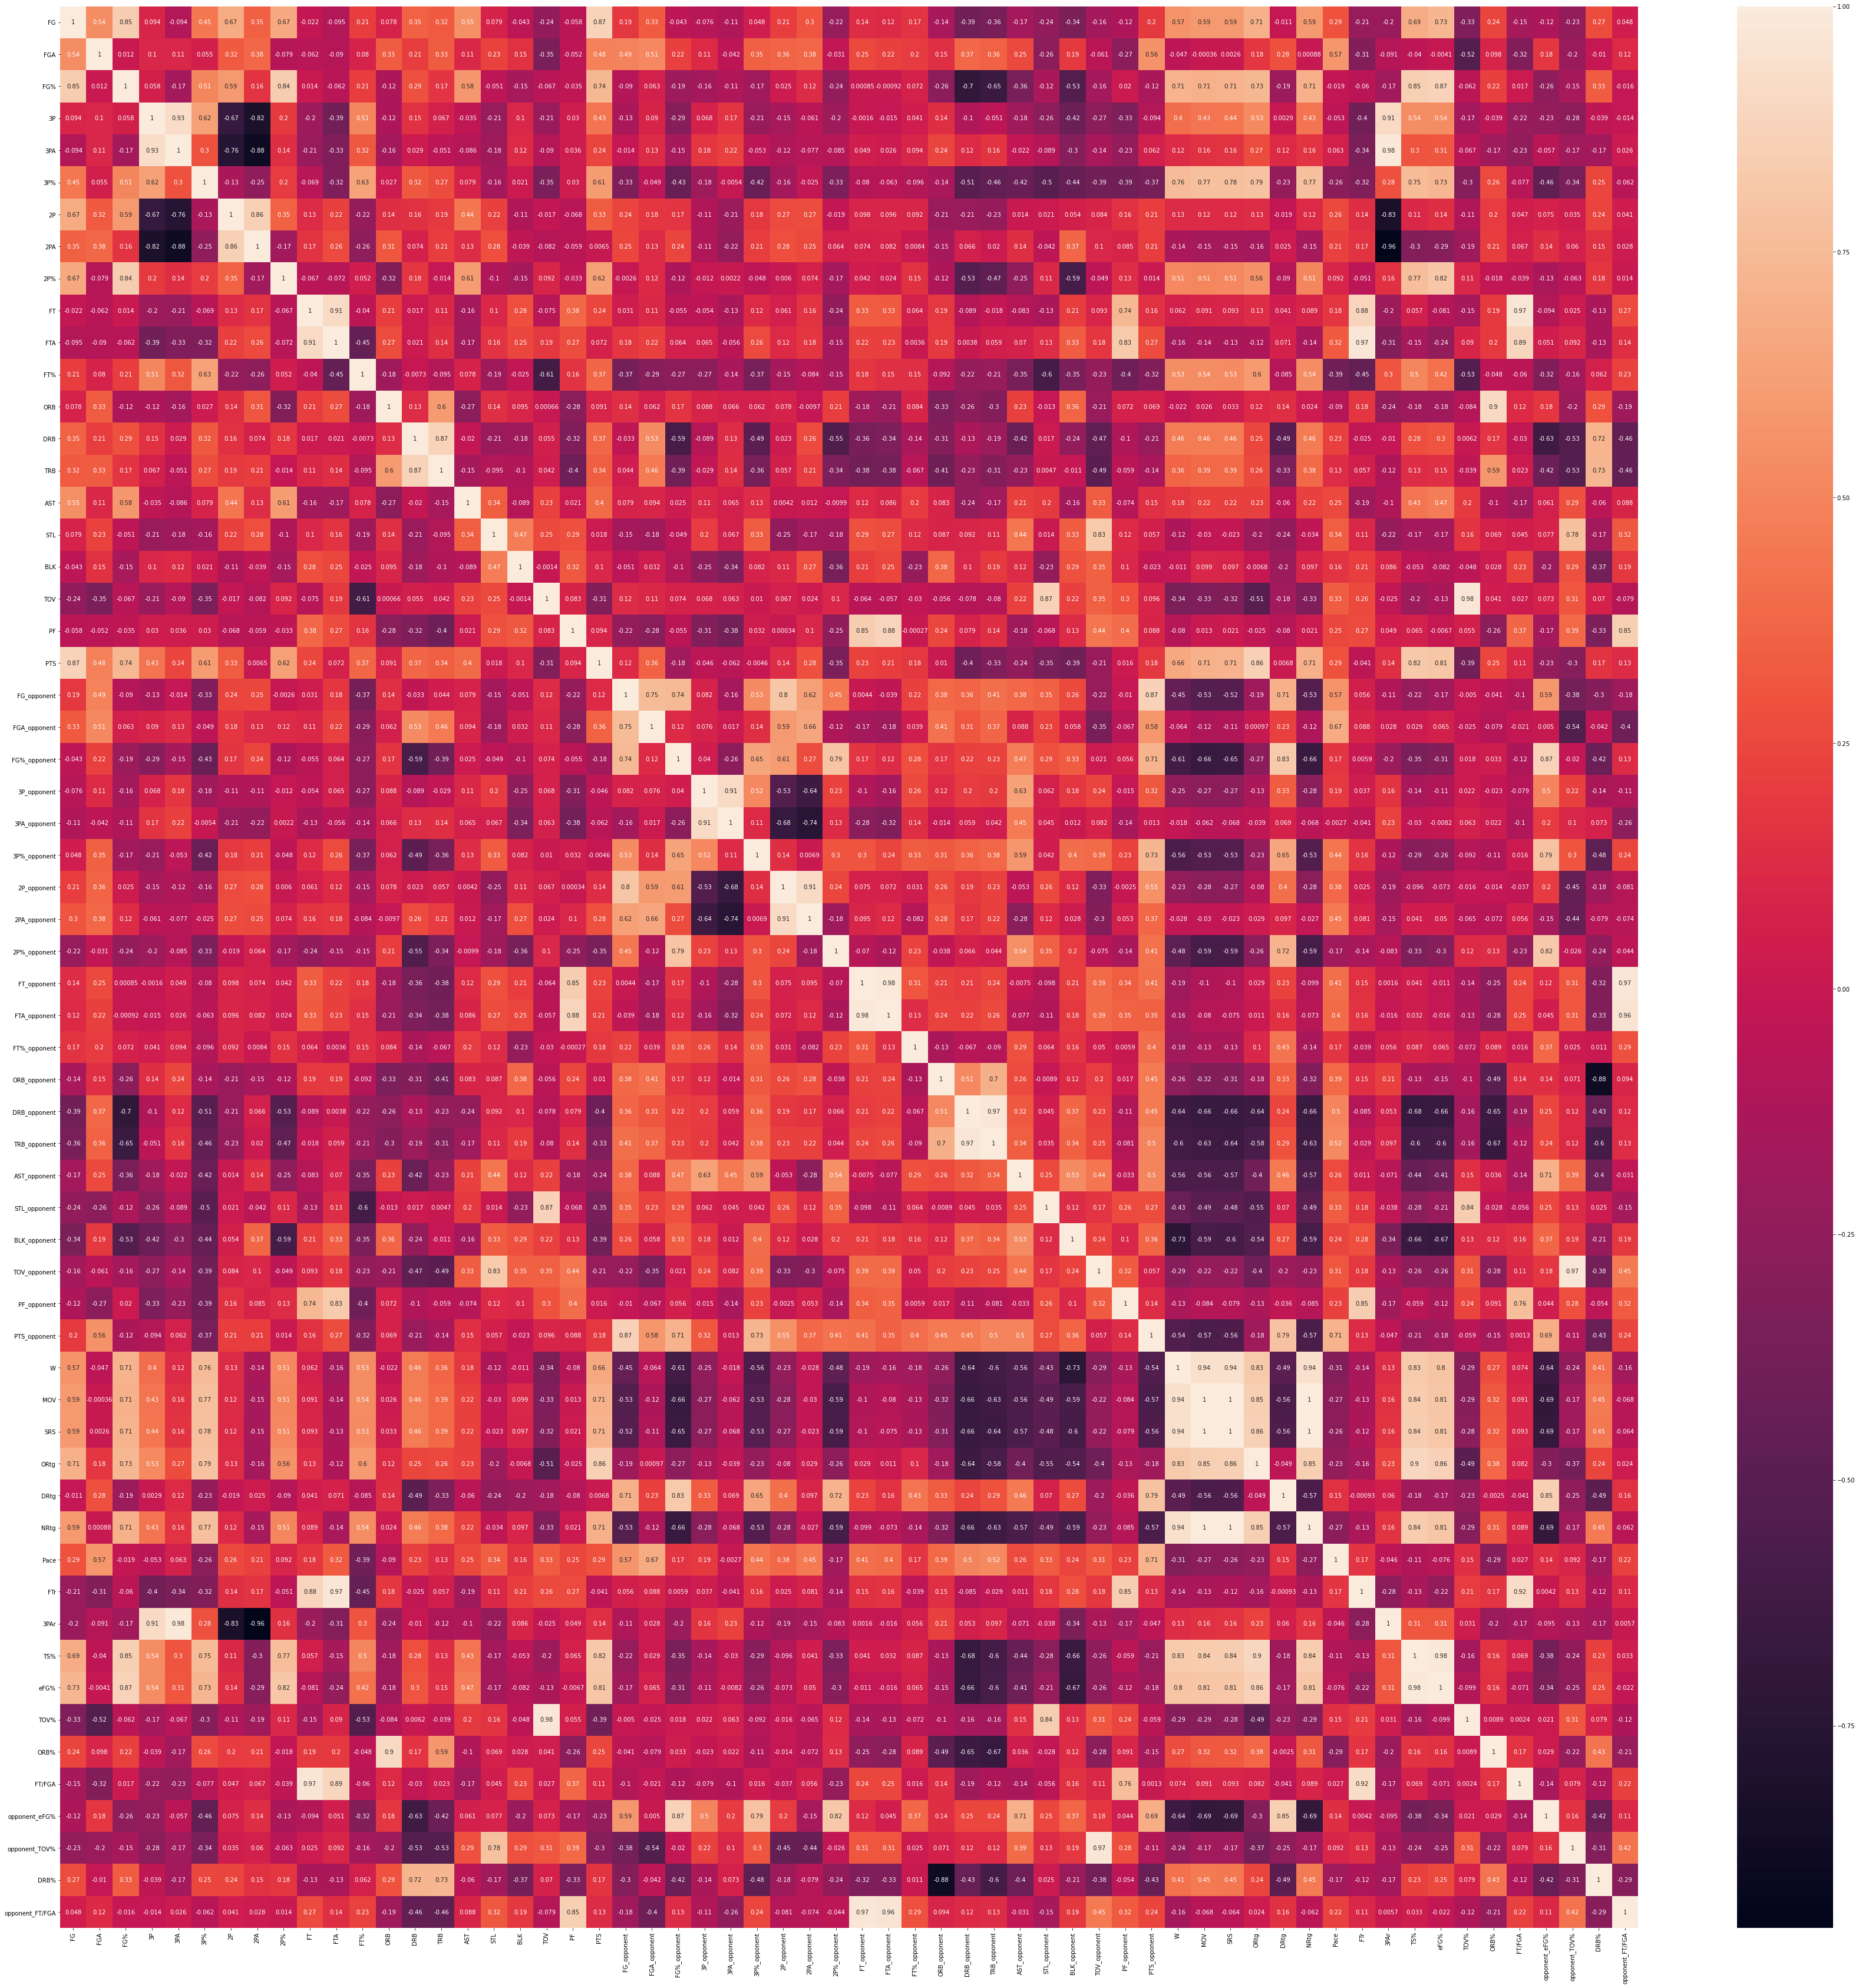

In [41]:
corrmat = preprocessing_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(60,60))
g = sns.heatmap(preprocessing_data[top_corr_features].corr(), annot=True)

In [88]:
cor_target = corrmat["W"]
relevant_features = cor_target[abs(cor_target) > 0.5]
relevant_features

FG               0.566182
FG%              0.712682
3P%              0.758415
2P%              0.511296
FT%              0.534283
PTS              0.661489
FG%_opponent    -0.608317
3P%_opponent    -0.562968
DRB_opponent    -0.641579
TRB_opponent    -0.604865
AST_opponent    -0.562741
BLK_opponent    -0.734357
PTS_opponent    -0.537908
W                1.000000
MOV              0.941532
SRS              0.943730
ORtg             0.828047
NRtg             0.941935
TS%              0.827046
eFG%             0.795698
opponent_eFG%   -0.641000
Name: W, dtype: float64

In [89]:
relevant_features.drop("W", inplace=True)
relevant_columns = ["Team", "FG", "FG", "3P%", "2P%", "FT%", "PTS", "FG%_opponent", "3P%_opponent", "DRB_opponent", "TRB_opponent", "AST_opponent", "BLK_opponent", "PTS_opponent", "MOV", "SRS", "ORtg", "NRtg", "TS%", "eFG%", "opponent_eFG%"]

In [83]:
offensive_features = ["FG", "FG%", "3P%", "2P%", "FT%", "PTS", "BLK_opponent", "ORtg", "TS%", "eFG%"]
defensive_features = ["FG%_opponent", "3P%_opponent", "AST_opponent", "PTS_opponent", "opponent_eFG%"]
overall_features = ["TRB_opponent", "MOV", "SRS", "NRtg"]
relevant_offensive_features = relevant_features.loc[offensive_features]
relevant_defensive_features = relevant_features.loc[defensive_features]
relevant_overall_features = relevant_features.loc[overall_features]

In [55]:
relevant_offensive_features

FG              0.566182
FG%             0.712682
3P%             0.758415
2P%             0.511296
FT%             0.534283
PTS             0.661489
BLK_opponent   -0.734357
ORtg            0.828047
TS%             0.827046
eFG%            0.795698
Name: W, dtype: float64

In [84]:
relevant_defensive_features

FG%_opponent    -0.608317
3P%_opponent    -0.562968
AST_opponent    -0.562741
PTS_opponent    -0.537908
opponent_eFG%   -0.641000
Name: W, dtype: float64

In [85]:
relevant_overall_features

TRB_opponent   -0.604865
MOV             0.941532
SRS             0.943730
NRtg            0.941935
Name: W, dtype: float64

In [86]:
nine_most_relevant_features = relevant_features[abs(relevant_features) > .7]
nine_most_relevant_features

FG%             0.712682
3P%             0.758415
BLK_opponent   -0.734357
MOV             0.941532
SRS             0.943730
ORtg            0.828047
NRtg            0.941935
TS%             0.827046
eFG%            0.795698
Name: W, dtype: float64

In [73]:
nine_most_relevant_features.index

Index(['FG%', '3P%', 'BLK_opponent', 'MOV', 'SRS', 'ORtg', 'NRtg', 'TS%',
       'eFG%'],
      dtype='object')

In [91]:
nine_most_relevant_columns = ["Team", "FG%", "3P%", "BLK_opponent", "MOV", "SRS", "ORtg", "NRtg", "TS%", "eFG%"]
most_relevant_team_stats = team_stats[nine_most_relevant_columns]
most_relevant_team_stats

Team    FG%    3P%  BLK_opponent    MOV   SRS   ORtg  \
0            Brooklyn Nets  0.493  0.388           4.6   4.42  4.05  118.3   
1          Milwaukee Bucks  0.486  0.392           4.9   6.32  6.18  116.7   
2                Utah Jazz  0.467  0.391           3.9   9.06  9.01  117.5   
3     Los Angeles Clippers  0.482  0.416           4.1   6.03  6.04  117.9   
4           Denver Nuggets  0.488  0.380           4.3   5.36  5.09  117.5   
5     New Orleans Pelicans  0.482  0.351           5.7   0.42  0.33  114.5   
6       Washington Wizards  0.473  0.350           4.8  -2.53 -2.48  110.4   
7            Atlanta Hawks  0.462  0.370           5.1   1.17  1.27  114.7   
8   Portland Trail Blazers  0.448  0.380           4.8   0.51  0.41  116.8   
9   Minnesota Timberwolves  0.445  0.350           5.7  -6.55 -6.16  108.7   
10   Golden State Warriors  0.465  0.374           4.5  -0.28 -0.16  110.1   
11          Indiana Pacers  0.471  0.361           5.3   0.02 -0.04  112.1   
12            Phoenix Suns  0.489  0.373           3.6   6.16  6.15  116.4   
13          Boston Celtics  0.466  0.372           4.6   1.73  1.93  114.0   
14        Sacramento Kings  0.482  0.365           4.6  -4.73 -4.19  114.2   
15      Philadelphia 76ers  0.476  0.371           4.6   5.35  5.51  112.8   
16         Toronto Raptors  0.450  0.371           5.7   0.36  0.07  112.5   
17       Memphis Grizzlies  0.466  0.356           5.3   0.94  1.18  111.7   
18           Chicago Bulls  0.478  0.365           5.0  -1.61 -1.85  110.9   
19        Dallas Mavericks  0.470  0.362           3.8   2.10  2.38  115.0   
20       Charlotte Hornets  0.458  0.377           4.7  -1.22 -1.18  111.2   
21      Los Angeles Lakers  0.474  0.352           4.5   3.13  2.87  109.9   
22         Houston Rockets  0.441  0.335           5.3  -7.39 -7.48  106.3   
23       San Antonio Spurs  0.462  0.356           5.1  -0.53 -1.11  111.3   
24         Detroit Pistons  0.450  0.355           6.0  -3.98 -3.78  108.4   
25              Miami Heat  0.463  0.350           4.1  -0.44 -0.58  109.9   
26         New York Knicks  0.457  0.387           5.6   2.30  1.93  110.8   
27   Oklahoma City Thunder  0.442  0.342           5.2 -10.06 -9.66  103.5   
28           Orlando Magic  0.430  0.346           5.3  -8.25 -8.08  105.3   
29     Cleveland Cavaliers  0.454  0.338           5.5  -7.48 -7.43  106.0   

    NRtg    TS%   eFG%  
0    4.4  0.608  0.573  
1    6.1  0.593  0.565  
2    9.2  0.596  0.563  
3    6.2  0.599  0.564  
4    5.4  0.591  0.561  
5    0.4  0.576  0.543  
6   -2.4  0.568  0.530  
7    1.1  0.576  0.533  
8    0.5  0.572  0.534  
9   -6.4  0.552  0.517  
10  -0.3  0.578  0.546  
11   0.0  0.573  0.540  
12   6.3  0.594  0.562  
13   1.8  0.574  0.542  
14  -4.8  0.581  0.551  
15   5.3  0.578  0.540  
16   0.4  0.572  0.533  
17   1.0  0.559  0.526  
18  -1.6  0.576  0.548  
19   2.2  0.581  0.549  
20  -1.3  0.569  0.538  
21   3.1  0.570  0.538  
22  -7.3  0.549  0.517  
23  -0.5  0.556  0.520  
24  -4.0  0.556  0.518  
25  -0.5  0.575  0.538  
26   2.4  0.558  0.523  
27  -9.9  0.542  0.511  
28  -8.4  0.528  0.492  
29  -7.6  0.545  0.512

In [92]:
relevant_team_stats = team_stats[relevant_columns]
relevant_team_stats

Team    FG    FG    3P%    2P%    FT%    PTS  \
0            Brooklyn Nets  43.2  43.2  0.388  0.567  0.809  118.8   
1          Milwaukee Bucks  44.5  44.5  0.392  0.550  0.761  119.3   
2                Utah Jazz  41.1  41.1  0.391  0.541  0.797  116.4   
3     Los Angeles Clippers  41.9  41.9  0.416  0.525  0.834  114.3   
4           Denver Nuggets  43.5  43.5  0.380  0.554  0.798  115.5   
5     New Orleans Pelicans  42.7  42.7  0.351  0.552  0.732  115.3   
6       Washington Wizards  42.6  42.6  0.350  0.533  0.763  115.2   
7            Atlanta Hawks  40.2  40.2  0.370  0.520  0.811  112.6   
8   Portland Trail Blazers  40.9  40.9  0.380  0.504  0.826  115.1   
9   Minnesota Timberwolves  40.4  40.4  0.350  0.511  0.766  111.3   
10   Golden State Warriors  41.0  41.0  0.374  0.535  0.778  112.9   
11          Indiana Pacers  42.8  42.8  0.361  0.539  0.790  114.5   
12            Phoenix Suns  43.1  43.1  0.373  0.564  0.826  114.4   
13          Boston Celtics  41.4  41.4  0.372  0.531  0.777  112.6   
14        Sacramento Kings  42.7  42.7  0.365  0.552  0.746  114.3   
15      Philadelphia 76ers  41.4  41.4  0.371  0.531  0.763  113.7   
16         Toronto Raptors  39.7  39.7  0.371  0.514  0.826  111.6   
17       Memphis Grizzlies  42.9  42.9  0.356  0.522  0.777  113.3   
18           Chicago Bulls  42.3  42.3  0.365  0.548  0.796  110.9   
19        Dallas Mavericks  41.0  41.0  0.362  0.554  0.773  112.0   
20       Charlotte Hornets  40.0  40.0  0.377  0.518  0.763  109.8   
21      Los Angeles Lakers  40.8  40.8  0.352  0.544  0.744  109.6   
22         Houston Rockets  39.0  39.0  0.335  0.530  0.740  107.9   
23       San Antonio Spurs  41.7  41.7  0.356  0.513  0.788  111.2   
24         Detroit Pistons  38.6  38.6  0.355  0.509  0.765  107.1   
25              Miami Heat  38.6  38.6  0.350  0.548  0.791  106.8   
26         New York Knicks  39.5  39.5  0.387  0.493  0.779  107.0   
27   Oklahoma City Thunder  38.8  38.8  0.342  0.510  0.728  105.2   
28           Orlando Magic  38.4  38.4  0.346  0.477  0.776  104.0   
29     Cleveland Cavaliers  38.9  38.9  0.338  0.514  0.743  103.9   

    FG%_opponent  3P%_opponent  DRB_opponent  ...  AST_opponent  BLK_opponent  \
0          0.462         0.366          32.5  ...          24.4           4.6   
1          0.453         0.375          33.8  ...          25.0           4.9   
2          0.447         0.340          33.1  ...          22.2           3.9   
3          0.465         0.360          32.2  ...          22.9           4.1   
4          0.469         0.362          31.9  ...          26.2           4.3   
5          0.469         0.382          32.3  ...          25.8           5.7   
6          0.470         0.372          35.7  ...          24.3           4.8   
7          0.464         0.347          32.8  ...          24.1           5.1   
8          0.477         0.368          35.6  ...          25.2           4.8   
9          0.482         0.392          36.0  ...          26.8           5.7   
10         0.454         0.365          36.9  ...          24.0           4.5   
11         0.467         0.370          35.6  ...          25.9           5.3   
12         0.462         0.352          33.5  ...          22.3           3.6   
13         0.463         0.372          32.7  ...          24.2           4.6   
14         0.494         0.389          34.4  ...          25.6           4.6   
15         0.454         0.363          33.1  ...          23.4           4.6   
16         0.458         0.377          35.6  ...          25.7           5.7   
17         0.463         0.364          35.3  ...          25.4           5.3   
18         0.475         0.355          33.4  ...          24.2           5.0   
19         0.459         0.364          34.3  ...          22.5           3.8   
20         0.466         0.365          34.3  ...          27.3           4.7   
21         0.458         0.351          33.0  ...          24.7      

In [94]:
relevant_team_stats.to_csv(pwd + "/../datasets/20_relevant_team_stats.csv", index=False)
most_relevant_team_stats.to_csv(pwd + "/../datasets/9_relevant_team_stats.csv", index=False)